Import The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

2024-06-20 09:36:27.521336: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 09:36:27.573531: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 09:36:27.573569: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 09:36:27.575028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 09:36:27.583157: I tensorflow/core/platform/cpu_feature_guar

Load the data

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

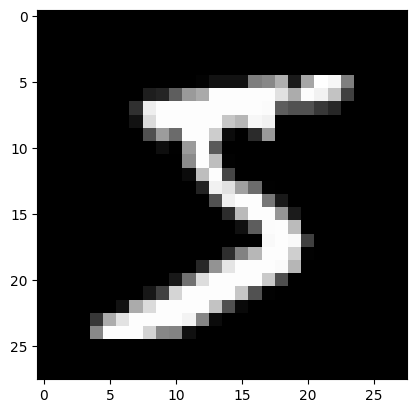

In [3]:
plt.imshow(x_train[0], cmap='gray')

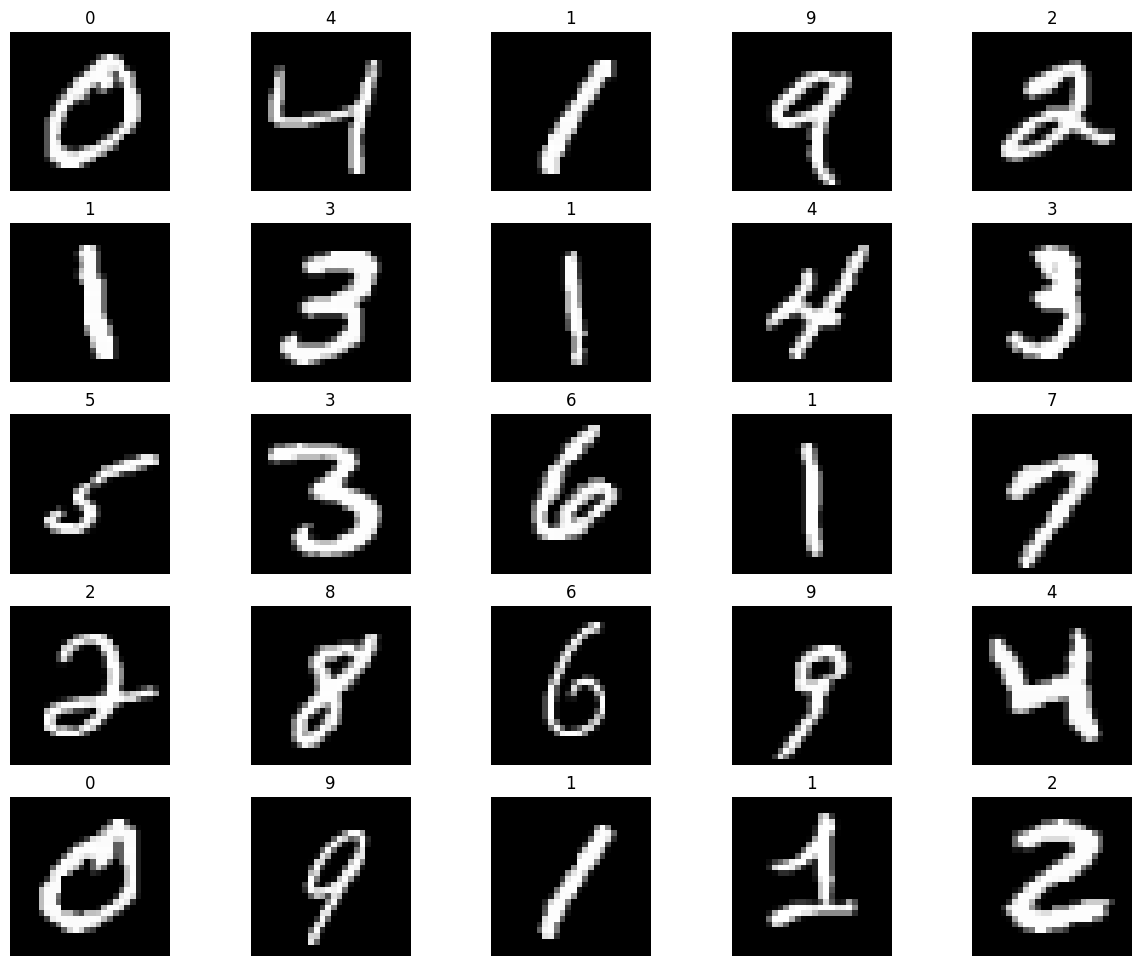

In [4]:
plt.figure(figsize=(15,12))
count=0
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

ANN can only read one line of data at a time 
but our images are 2D data

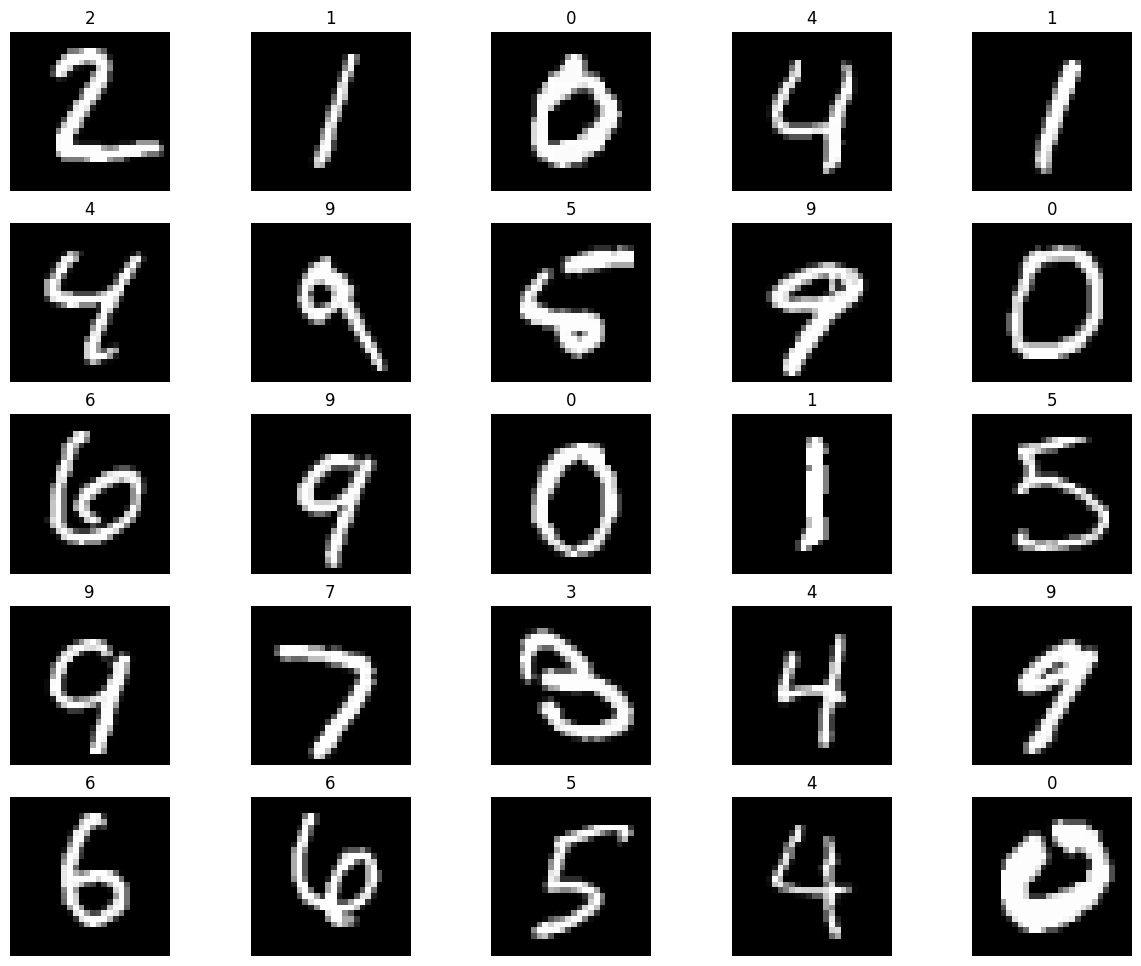

In [5]:
plt.figure(figsize=(15,12))
count=0
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(y_test[i])

Data Preparation

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Normalize

In [7]:
x_train = x_train / 255
x_test = x_test / 255

Convert 2D data into 1D

- reshape 
- flatten - tensoflow vector or numpy array converts from multi-d to 1-d

both will help

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0].size

784

In [10]:
m=np.array([[6,3,1],[8,9,7]])
m
m.size

6

In [11]:
m.flatten()

array([6, 3, 1, 8, 9, 7])

In [12]:
m.reshape(m.size)

array([6, 3, 1, 8, 9, 7])

In [13]:
np.reshape(m, m.size)

array([6, 3, 1, 8, 9, 7])

In [14]:
x_train = x_train.reshape(-1, x_train[0].size)
x_test = x_test.reshape(-1, x_test[0].size)
# -1 signifies take all values of x_train and x_test respectively

In [15]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Prepare the output variable

In [16]:
import seaborn as sns

<Axes: xlabel='count'>

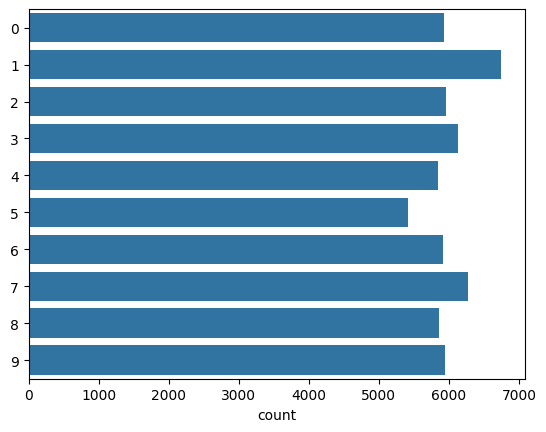

In [17]:
sns.countplot(y=y_train)

<Axes: xlabel='count'>

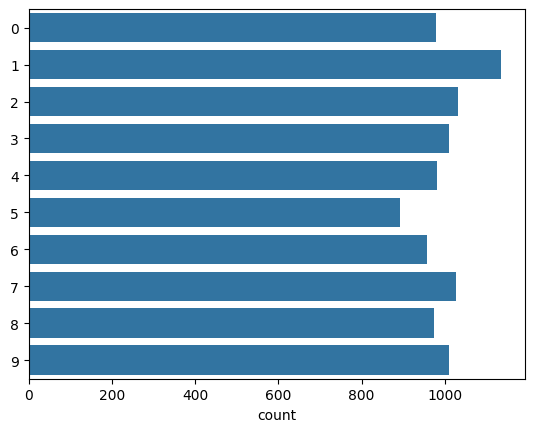

In [18]:
sns.countplot(y=y_test)

In [19]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [20]:
y_train = to_categorical(y_train) #encoding done
y_test = to_categorical(y_test) # 1 and 0

In [21]:
y_train.shape, y_train.shape

((60000, 10), (60000, 10))

In [22]:
y_train 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Build the model

In [23]:
model = Sequential()

# Input Layer
model.add(Dense(512, input_shape=(784, ), activation='relu'))

# Hidden Layer
model.add(Dense(128, activation="relu"))

#Output Layer
model.add(Dense(10, activation="softmax"))

2024-06-20 09:36:35.335330: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


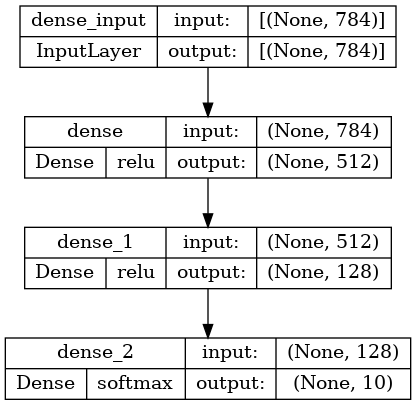

In [25]:
# pip install pydot
# !pip install graphviz
plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes=True)

Compile the model

In [26]:
import keras
model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'], optimizer='adam')

In [27]:
# model.compile?

In [28]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.1856 - accuracy: 0.9437
Epoch 2/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0905 - accuracy: 0.9719
Epoch 3/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0647 - accuracy: 0.9802
Epoch 4/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 5/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0413 - accuracy: 0.9872
Epoch 6/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0367 - accuracy: 0.9890
Epoch 7/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0335 - accuracy: 0.9903
Epoch 8/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0283 - accuracy: 0.9916
Epoch 9/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0265 - accuracy: 0.9923
Epoch 10/10
6000/6000 [==============================] - 32s 5ms/step - l

Evaluate on Test Data

In [ ]:
model.evaluate(x_test, y_test, batch_size=1)

Predict new Image

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
new = x_test[2345]

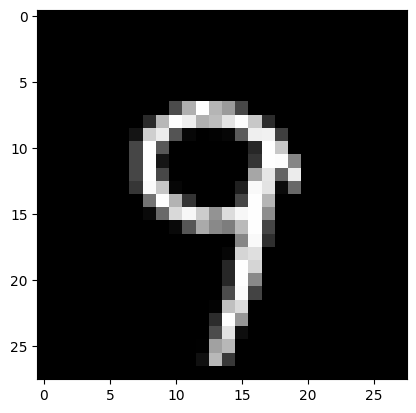

In [60]:
plt.imshow(new, cmap='gray')

In [88]:
new = new / 255
y = model.predict(new.reshape(-1,new.size))

# or

new = new / 255
new= new.reshape(1,784)
result = model.predict(new)
np.argmax(result)

1/1 [==============================] - 0s 21ms/step


8

In [62]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [63]:
indx = np.argmax(y)
indx

9

Predict on Screenshot

In [104]:
from skimage import io
ss_sk = io.imread('/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/Day 16/PredictScreenshot20Jun.png') 
#, 0 does nothing in skimage

import cv2
ss_cv = cv2.imread('/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/Day 16/PredictScreenshot20Jun.png',0)

In [105]:
ss_sk.shape, ss_cv.shape

((225, 226, 4), (225, 226))

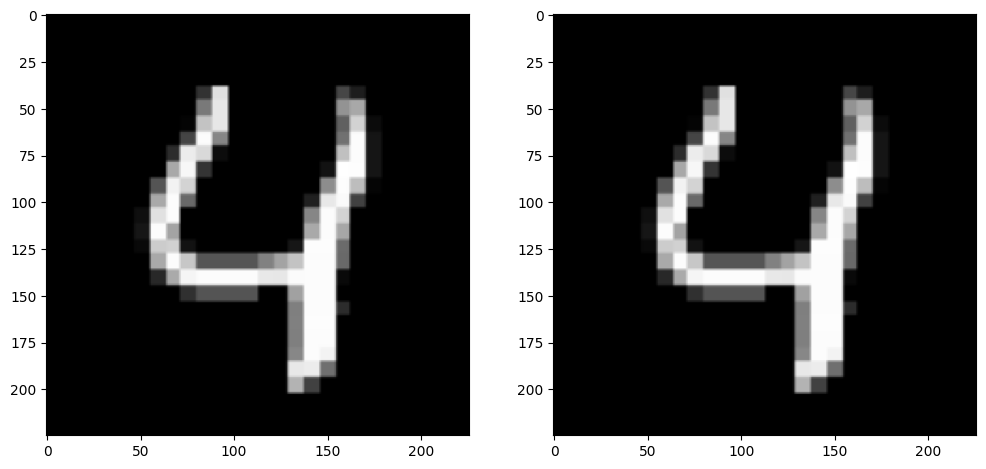

In [106]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(ss_sk, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ss_cv, cmap='gray')

In [107]:
# from skimage.color import rgb2gray
# ss_sk = ss_sk / 255
# ss_sk = rgb2gray(ss_sk)
# print(ss_sk.shape)
# ss_sk = cv2.resize(ss_sk, (28,28))
# y = model.predict(ss_sk.reshape(1,784))

# or
ss_cv = cv2.resize(ss_cv, (28,28))
ss_cv = ss_cv / 255
ss_cv= ss_cv.reshape(1,784)
result = model.predict(ss_cv)
np.argmax(result)

1/1 [==============================] - 0s 23ms/step


4

OpenCV is the oldest image processing library. More preference over Skimage